In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matrix = np.array([[1, 2],
                   [3, 4]])  # Example 2x2 matrix

colors = ['r', 'g', 'b', 'y']  # Colors for each vector
labels = ['Eigen 1', 'Eigen 2', 'Vector', 'Vector 4']

eigenvalues, eigenvectors = np.linalg.eig(matrix)
vector = np.array([1, 1])  # Example 1x2 vector
vectors = np.concatenate((eigenvectors, [vector]))

In [3]:
print(eigenvectors)
print(eigenvalues)


[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
[-0.37228132  5.37228132]


In [4]:
result = np.dot(matrix, vector)

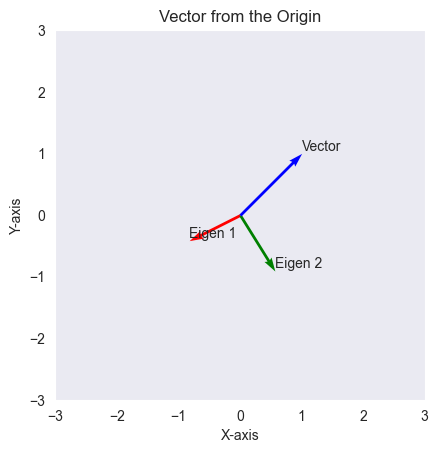

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Plot each vector with a different color
for i, vector in enumerate(vectors):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=colors[i])
    ax.text(vector[0], vector[1], labels[i], ha='left', va='bottom')

# Set the x and y axis limits
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector from the Origin')

# Show the plot
plt.grid()
plt.show()

## Understanding SVD. What does it really mean to multiply $A*A^{t}$

In [6]:
# let's say we have user votes for different options and we want to
# discover relations between the movies
# say we have a scale of 1-5 for how much someone liked a movie, and a list of movies
# star trek, indiana jones, and back to the future

A = np.array([[5, 2, 4],
              [4, 2, 1],
              [1, 5, 2],
              [5, 5, 5]])
#
# center the values
#

# compute the mean of each column. This results in a 1 x n vector
mean_vector = np.mean(A, axis=0)
print(mean_vector)

# subtract the mean vector from each row of A.
# numpy's broadcasting rules automatically subtract the mean from each column.
A = A - mean_vector


#
# transpose and print
#
At = A.transpose()
print(A)
print(At)

[3.75 3.5  3.  ]
[[ 1.25 -1.5   1.  ]
 [ 0.25 -1.5  -2.  ]
 [-2.75  1.5  -1.  ]
 [ 1.25  1.5   2.  ]]
[[ 1.25  0.25 -2.75  1.25]
 [-1.5  -1.5   1.5   1.5 ]
 [ 1.   -2.   -1.    2.  ]]


Given A =
[[a b]
[c d]]

Then A * A^t^
is:
[a^2^ + b^2^, ac + bd]
[ca + db, c^2^ + d^2^]

The resulting matrix obtained from multiplying a 2x2 matrix A by its transpose A^T provides several insights and information about the original matrix. Here are some interpretations of the elements in the resulting matrix:

1. Diagonal Elements: The diagonal elements, [a^2^ + b^2^] and [c^2^ + d^2^], represent the sum of squares of the corresponding rows of the original matrix A. They give you the squared magnitudes or norms of the individual rows.

2. Off-Diagonal Elements: The off-diagonal elements, [ac + bd] and [ca + db], represent the dot products between different rows of the original matrix A. They indicate the similarity or alignment between different rows of the matrix.

3. Symmetry: The resulting matrix is symmetric because it is the result of multiplying a matrix by its transpose. This symmetry implies that the dot products between rows of the matrix are symmetric or that the alignment between rows is the same in both directions.

4. Positive Semidefinite: The resulting matrix is positive semidefinite, which means its eigenvalues are non-negative. This property is a consequence of multiplying a matrix by its transpose.

Overall, the resulting matrix provides information about the squared magnitudes of the individual rows of the original matrix, the dot products between different rows, the symmetry of the matrix, and its positive semidefinite nature. These properties can be relevant in various contexts, such as analyzing similarities, norms, or relationships between vectors represented by the rows of the matrix.

The element C(i, j) in this covariance matrix is the covariance between the i-th variable and the j-th variable of your dataset

If we instead take A^t^ * A, the matrix can be interpreted as a covariance matrix between variables (not observations) if the data is appropriately centered


In [7]:
# covariance between observations
A @ At

array([[ 4.8125,  0.5625, -6.6875,  1.3125],
       [ 0.5625,  6.3125, -0.9375, -5.9375],
       [-6.6875, -0.9375, 10.8125, -3.1875],
       [ 1.3125, -5.9375, -3.1875,  7.8125]])

In [8]:
# covariance between variables/features (not scaled by number of variables)
At @ A

array([[10.75, -4.5 ,  6.  ],
       [-4.5 ,  9.  ,  3.  ],
       [ 6.  ,  3.  , 10.  ]])

In [9]:
# alternate method to compute covariance (not scaled by number of variables)
np.cov(A)

array([[ 2.3125    ,  0.6875    , -3.0625    ,  0.0625    ],
       [ 0.6875    ,  1.39583333, -1.6875    , -0.39583333],
       [-3.0625    , -1.6875    ,  4.5625    ,  0.1875    ],
       [ 0.0625    , -0.39583333,  0.1875    ,  0.14583333]])

In [10]:
np.cov(At)

array([[ 3.58333333, -1.5       ,  2.        ],
       [-1.5       ,  3.        ,  1.        ],
       [ 2.        ,  1.        ,  3.33333333]])

In [11]:
# the results are different because the np.cov() function uses Bessel's correction,
# dividing the sums by n-1. we do the same below

n = A.shape[0]  # number of observations
cov_matrix = (At @ A) / (n - 1)
cov_matrix

array([[ 3.58333333, -1.5       ,  2.        ],
       [-1.5       ,  3.        ,  1.        ],
       [ 2.        ,  1.        ,  3.33333333]])

How to interpret this covariance matrix:

The covariance matrix shows the relationship between different features of your data. Positive covariance values indicate that the two features increase together, negative values mean that when one feature increases, the other decreases, and a covariance near zero indicates that the two features are not linearly correlated.

How to use this covariance data:

* Dimensionality Reduction: In techniques like Principal Component Analysis (PCA), the covariance matrix is used to reduce the dimensionality of the data while retaining the important features.
* Machine Learning: Covariance matrices are used in various machine learning algorithms such as Linear Regression, Gaussian Mixture Models, and Kalman Filters.
* Portfolio Theory: In finance, covariance matrices are used to understand the volatility of a portfolio of diverse assets.
* Data Analysis: Covariance matrices can provide insights into the relationships between different features in your data.
* Feature Selection: If two features have a high absolute covariance, they are highly correlated. This might mean you could use just one of them without losing much information, which is useful when you're trying to reduce the complexity of your model.

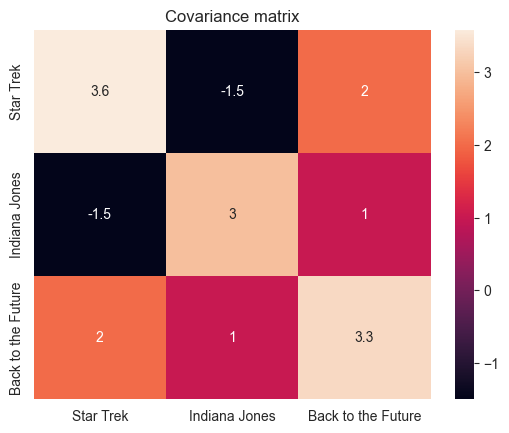

In [12]:
# create a heatmap of the covariance matrix
sns.heatmap(cov_matrix, annot=True,
            xticklabels=["Star Trek", "Indiana Jones", "Back to the Future"],
            yticklabels=["Star Trek", "Indiana Jones", "Back to the Future"])
plt.title("Covariance matrix")
plt.show()

The above is difficult to interpret because it is on the scale of the variables. We can fix this by creating the correlation matrix which has a range of -1 -> 1. We do this by standardizing the features

In [13]:
corr_matrix = np.corrcoef(A, rowvar=False)

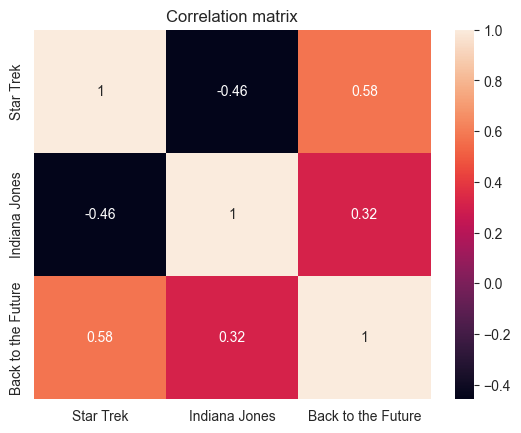

In [14]:
sns.heatmap(corr_matrix, annot=True,
            xticklabels=["Star Trek", "Indiana Jones", "Back to the Future"],
            yticklabels=["Star Trek", "Indiana Jones", "Back to the Future"])
plt.title("Correlation matrix")
plt.show()

Correlation ranges from -1 -> 1.
* -1 means perfect correlation in opposite directions (negative correlation)
* +1 means perfect correlation in the same direction
* 0 means no correlation

Numbers in between indicate some level of correlation. As an example:

* 0-0.3 or 0 to -0.3: Little to weak correlation
* 0.3-0.7 or -0.3 to -0.7: Moderate correlation
* 0.7-1 or -0.7 to -1: Strong correlation

### Now for SVD

In the SVD of a matrix A = UΣVᵗ, U and V are both orthogonal matrices, but they are not transposes of each other.

U is the eigendecomposition of A * Aᵗ sorted in descending order  --> These are the left singular vectors of A
Vᵗ is the eigendecomposition of Aᵗ * A sorted in descending order  --> These are the right singular vectors of A
Σ is the square root of the eigenvalues of either left or right singular values sorted in decending order

Common uses for SVD:

* Matrix Factorization: The SVD factorizes a matrix A into three separate matrices: U, Σ, and Vᵀ. This factorization can be used to approximate or reconstruct the original matrix A. By selecting a subset of singular values and their associated singular vectors, you can represent A with reduced dimensions, effectively compressing the data.
* Rank Determination: The SVD provides information about the rank of a matrix. The number of non-zero singular values indicates the rank, and any zero singular values imply linear dependence among the columns or rows of the matrix. This property can be useful for feature selection, dimensionality reduction, and identifying the intrinsic structure of the data.
* Low-Rank Approximation: By retaining only the largest singular values and their associated singular vectors, you can obtain a low-rank approximation of the original matrix A. This approximation can be useful for denoising data, reducing noise or outliers, and extracting dominant patterns or features.
* Data Compression and Reconstruction: The SVD allows you to compress data by representing it with a reduced number of singular values and their corresponding singular vectors. You can then reconstruct the original data from this compressed representation. This technique is particularly valuable in applications where storage or computational resources are limited.
* Collaborative Filtering and Recommendation Systems: The SVD has been widely used in recommender systems to analyze user-item matrices. By decomposing the matrix into user and item latent factors, the SVD-based models can make personalized recommendations based on patterns and similarities among users and items.
* Principal Component Analysis (PCA): PCA is a technique that utilizes the SVD to transform a dataset into a new coordinate system, where the transformed variables (principal components) capture the maximum variance in the data. PCA is useful for data visualization, dimensionality reduction, and feature extraction.
* Data Cleaning and Outlier Detection: The SVD can help identify and handle outliers in data. By examining the contribution of singular values and the associated singular vectors, anomalies or outliers can be identified based on their significant deviation from the normal patterns in the data.

In [17]:
# Compute SVD
U, s, Vh = np.linalg.svd(A)

print("Left singular vectors (U):")
print(U)
print("Singular values (s):")
print(s)
print("Right singular vectors (Vh):")
print(Vh)

Left singular vectors (U):
[[ 0.46331447 -0.25857901  0.6844535   0.5       ]
 [-0.16393032 -0.67966586 -0.51105887  0.5       ]
 [-0.74704085  0.34454414  0.27059065  0.5       ]
 [ 0.4476567   0.59370073 -0.44398528  0.5       ]]
Singular values (s):
[4.08220991 3.49117    0.94725616]
Right singular vectors (Vh):
[[ 0.77215376 -0.22001624  0.59613038]
 [-0.20007926  0.80624392  0.55672168]
 [-0.60311431 -0.54914806  0.57852359]]
